In [1]:
# Add the dependencies
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Clean up data
# Load test.csv file
file_to_load = os.path.join("Resources", "train.csv")
train = pd.read_csv(file_to_load)

In [3]:
# Exploratory Data Analysis on Training Dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Checking size of data
#The shape of our data
rows, columns = train.shape
print(f'This data contains {rows} rows and {columns} columns.')

This data contains 1460 rows and 81 columns.


In [5]:
# What type of data is available?
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Statistical summary of dataset
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# There are 81 columns
# Target variable is: SalePrice

In [8]:
# What data is missing? Checking for null values
for column in train:
    print(f"Column {column} has {train[column].isnull().sum()} null values.")

Column Id has 0 null values.
Column MSSubClass has 0 null values.
Column MSZoning has 0 null values.
Column LotFrontage has 259 null values.
Column LotArea has 0 null values.
Column Street has 0 null values.
Column Alley has 1369 null values.
Column LotShape has 0 null values.
Column LandContour has 0 null values.
Column Utilities has 0 null values.
Column LotConfig has 0 null values.
Column LandSlope has 0 null values.
Column Neighborhood has 0 null values.
Column Condition1 has 0 null values.
Column Condition2 has 0 null values.
Column BldgType has 0 null values.
Column HouseStyle has 0 null values.
Column OverallQual has 0 null values.
Column OverallCond has 0 null values.
Column YearBuilt has 0 null values.
Column YearRemodAdd has 0 null values.
Column RoofStyle has 0 null values.
Column RoofMatl has 0 null values.
Column Exterior1st has 0 null values.
Column Exterior2nd has 0 null values.
Column MasVnrType has 8 null values.
Column MasVnrArea has 8 null values.
Column ExterQual ha

In [9]:
# Null percentage for each column

null_values = train.isnull().mean().round(2)*100
null_df = pd.DataFrame({'percentMissing': null_values})
null_df

,percentMissing
Id,0.0
MSSubClass,0.0
MSZoning,0.0
LotFrontage,18.0
LotArea,0.0
...,...
MoSold,0.0
YrSold,0.0
SaleType,0.0
SaleCondition,0.0


In [10]:
# Features with over 50 percent null values
missing_values_train_df = pd.DataFrame({'percentMissing': null_values})
missing_values_train_df[missing_values_train_df['percentMissing'] > 50]

,percentMissing
Alley,94.0
PoolQC,100.0
Fence,81.0
MiscFeature,96.0


In [11]:
# Alley, PoolQC, Fence and MiscFeature all have over 50 percent missing values
# We will drop these features
train = train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [12]:
# Separating numerical & categorial features
object_columns_df = train.select_dtypes(include=['object'])
numerical_columns_df = train.select_dtypes(exclude=['object'])

In [13]:
# Categorical features
for column in object_columns_df:
    print(f"Column {column} has {object_columns_df[column].isnull().sum()} null values.")

Column MSZoning has 0 null values.
Column Street has 0 null values.
Column LotShape has 0 null values.
Column LandContour has 0 null values.
Column Utilities has 0 null values.
Column LotConfig has 0 null values.
Column LandSlope has 0 null values.
Column Neighborhood has 0 null values.
Column Condition1 has 0 null values.
Column Condition2 has 0 null values.
Column BldgType has 0 null values.
Column HouseStyle has 0 null values.
Column RoofStyle has 0 null values.
Column RoofMatl has 0 null values.
Column Exterior1st has 0 null values.
Column Exterior2nd has 0 null values.
Column MasVnrType has 8 null values.
Column ExterQual has 0 null values.
Column ExterCond has 0 null values.
Column Foundation has 0 null values.
Column BsmtQual has 37 null values.
Column BsmtCond has 37 null values.
Column BsmtExposure has 38 null values.
Column BsmtFinType1 has 37 null values.
Column BsmtFinType2 has 38 null values.
Column Heating has 0 null values.
Column HeatingQC has 0 null values.
Column Cent

In [14]:
# Fillna with 'None'
cols_fillna = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond', 'MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
object_columns_df[cols_fillna]= object_columns_df[cols_fillna].fillna('None')

C:\Users\hanna\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
# Make sure no null values
for column in object_columns_df:
    print(f"Column {column} has {object_columns_df[column].isnull().sum()} null values.")

Column MSZoning has 0 null values.
Column Street has 0 null values.
Column LotShape has 0 null values.
Column LandContour has 0 null values.
Column Utilities has 0 null values.
Column LotConfig has 0 null values.
Column LandSlope has 0 null values.
Column Neighborhood has 0 null values.
Column Condition1 has 0 null values.
Column Condition2 has 0 null values.
Column BldgType has 0 null values.
Column HouseStyle has 0 null values.
Column RoofStyle has 0 null values.
Column RoofMatl has 0 null values.
Column Exterior1st has 0 null values.
Column Exterior2nd has 0 null values.
Column MasVnrType has 0 null values.
Column ExterQual has 0 null values.
Column ExterCond has 0 null values.
Column Foundation has 0 null values.
Column BsmtQual has 0 null values.
Column BsmtCond has 0 null values.
Column BsmtExposure has 0 null values.
Column BsmtFinType1 has 0 null values.
Column BsmtFinType2 has 0 null values.
Column Heating has 0 null values.
Column HeatingQC has 0 null values.
Column CentralAi

In [16]:
# Numerical Features
for column in numerical_columns_df:
    print(f"Column {column} has {numerical_columns_df[column].isnull().sum()} null values.")

Column Id has 0 null values.
Column MSSubClass has 0 null values.
Column LotFrontage has 259 null values.
Column LotArea has 0 null values.
Column OverallQual has 0 null values.
Column OverallCond has 0 null values.
Column YearBuilt has 0 null values.
Column YearRemodAdd has 0 null values.
Column MasVnrArea has 8 null values.
Column BsmtFinSF1 has 0 null values.
Column BsmtFinSF2 has 0 null values.
Column BsmtUnfSF has 0 null values.
Column TotalBsmtSF has 0 null values.
Column 1stFlrSF has 0 null values.
Column 2ndFlrSF has 0 null values.
Column LowQualFinSF has 0 null values.
Column GrLivArea has 0 null values.
Column BsmtFullBath has 0 null values.
Column BsmtHalfBath has 0 null values.
Column FullBath has 0 null values.
Column HalfBath has 0 null values.
Column BedroomAbvGr has 0 null values.
Column KitchenAbvGr has 0 null values.
Column TotRmsAbvGrd has 0 null values.
Column Fireplaces has 0 null values.
Column GarageYrBlt has 81 null values.
Column GarageCars has 0 null values.
C

In [17]:
# fillna with mean for  LotFrontage, GarageYrBlt, MasVnrArea
numerical_columns_df.fillna(numerical_columns_df.mean(), inplace=True)

C:\Users\hanna\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
# Make sure no null values
for column in numerical_columns_df:
    print(f"Column {column} has {numerical_columns_df[column].isnull().sum()} null values.")

Column Id has 0 null values.
Column MSSubClass has 0 null values.
Column LotFrontage has 0 null values.
Column LotArea has 0 null values.
Column OverallQual has 0 null values.
Column OverallCond has 0 null values.
Column YearBuilt has 0 null values.
Column YearRemodAdd has 0 null values.
Column MasVnrArea has 0 null values.
Column BsmtFinSF1 has 0 null values.
Column BsmtFinSF2 has 0 null values.
Column BsmtUnfSF has 0 null values.
Column TotalBsmtSF has 0 null values.
Column 1stFlrSF has 0 null values.
Column 2ndFlrSF has 0 null values.
Column LowQualFinSF has 0 null values.
Column GrLivArea has 0 null values.
Column BsmtFullBath has 0 null values.
Column BsmtHalfBath has 0 null values.
Column FullBath has 0 null values.
Column HalfBath has 0 null values.
Column BedroomAbvGr has 0 null values.
Column KitchenAbvGr has 0 null values.
Column TotRmsAbvGrd has 0 null values.
Column Fireplaces has 0 null values.
Column GarageYrBlt has 0 null values.
Column GarageCars has 0 null values.
Colu

In [19]:
# Training dataset has been cleaned

In [20]:
# Seperate lists of categorical and numeric columns
cat_cols = []
num_cols = []
for col in train.columns.drop("SalePrice"):
    if train[col].dtypes == 'O':
        cat_cols.append(col)
    else:
        num_cols.append(col)

print("List of Numeric Columns:", num_cols)
print("\n")
print("List of Categorical Columns:", cat_cols)

List of Numeric Columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


List of Categorical Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', '

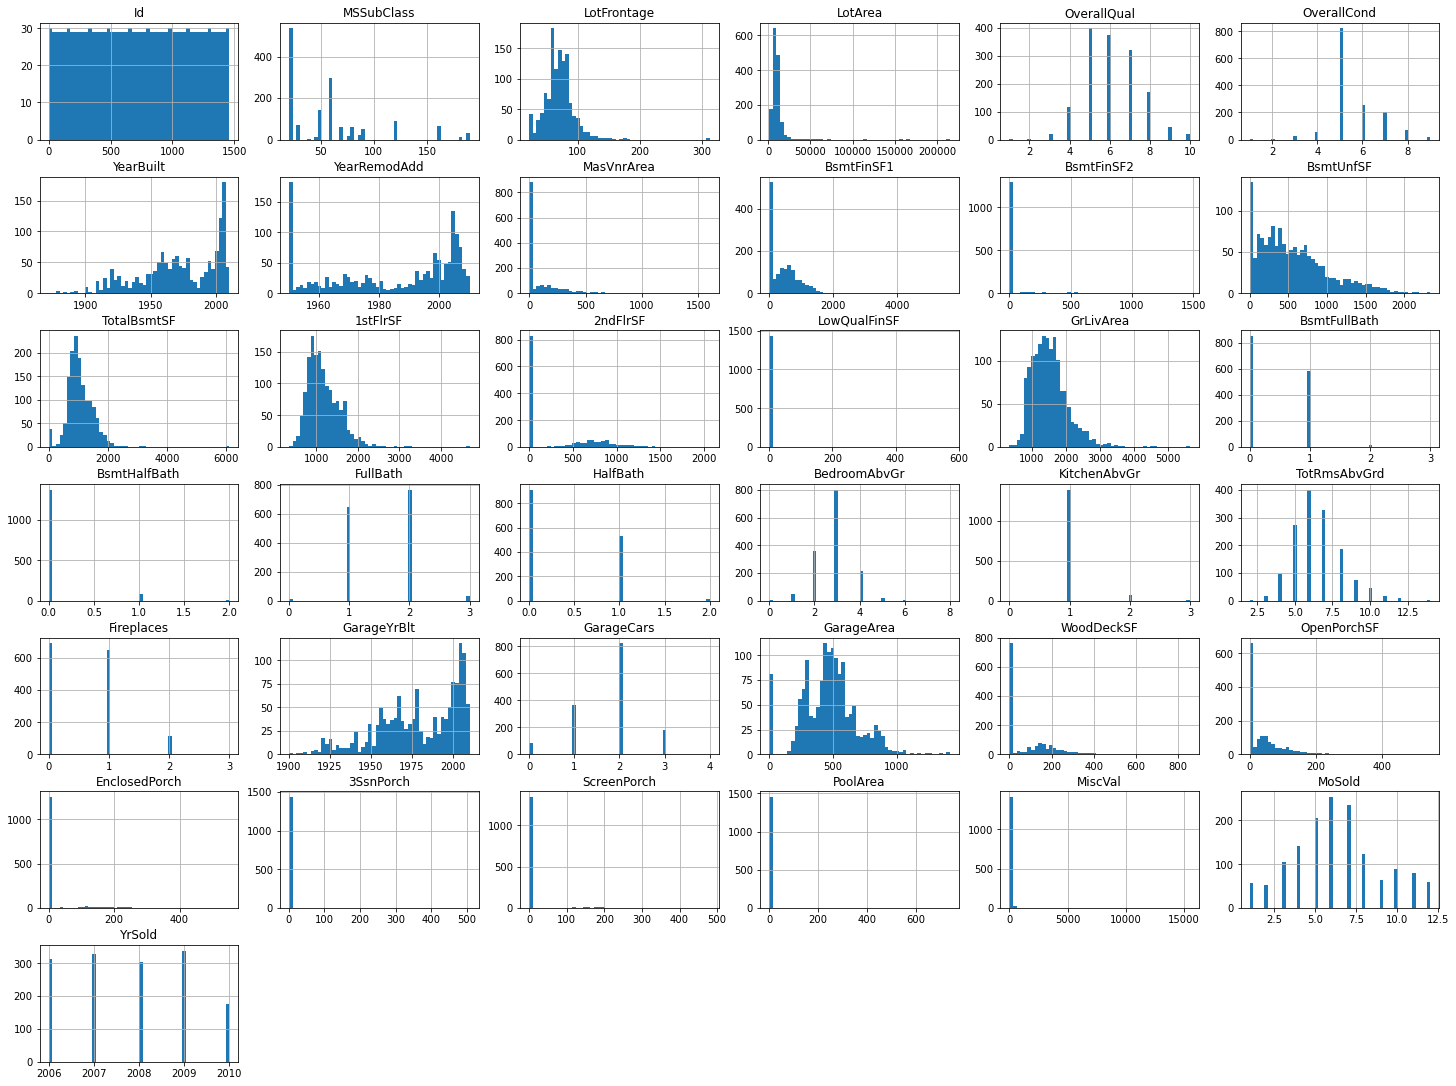

In [21]:
# Variance in the different numeric columns present in the dataset

train.hist(num_cols,bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
plt.show()

In [22]:
# Variance in numbers
for col in num_cols:
    print(train[col].value_counts())
    print("\n")

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64


7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64


2006    67
2005    64
2004    54
2007 

C:\Users\hanna\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hanna\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hanna\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C

C:\Users\hanna\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hanna\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\hanna\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C

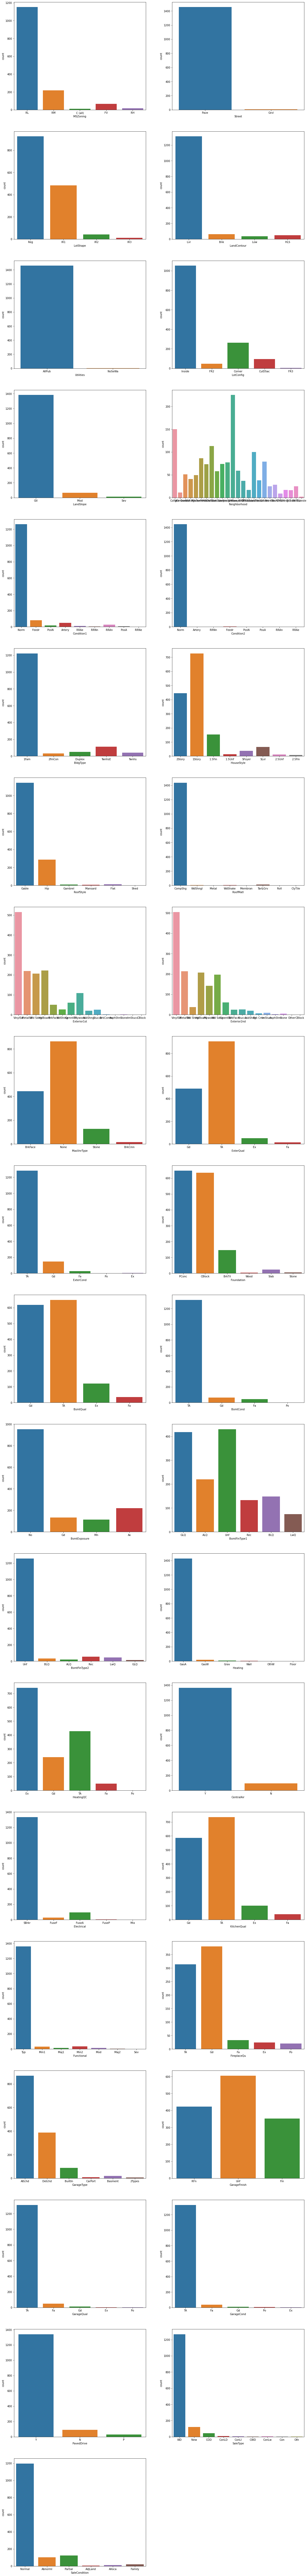

In [23]:
# Variance in the different categorial columns present in the dataset
plt.figure(figsize = (20,200))
for idx,col in enumerate(cat_cols):
    plt.subplot(22,2,idx+1)
    ax=sns.countplot(train[col])

In [24]:
# Variance in numbers
for col in cat_cols:
    print(train[col].value_counts())
    print("\n")

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


Norm      1260
Feedr     

In [25]:
# Drop the variables identified as having low variance
low_var_num = ['BsmtFinSF2','ScreenPorch', 'LowQualFinSF','3SsnPorch','PoolArea','MiscVal']
low_var_cat = ['Utilities','Condition2','RoofMatl','Heating','Street']

In [26]:
object_columns_df = object_columns_df.drop(low_var_cat,axis=1)
numerical_columns_df = numerical_columns_df.drop(low_var_num,axis=1)

In [27]:
# Catergorical columns with the low variance removed
cat_cols = list(set(cat_cols)-set(low_var_cat))
cat_cols

['LandSlope',
 'Functional',
 'Exterior2nd',
 'LotShape',
 'SaleCondition',
 'HouseStyle',
 'CentralAir',
 'Neighborhood',
 'BsmtQual',
 'FireplaceQu',
 'GarageQual',
 'MSZoning',
 'BsmtFinType1',
 'Condition1',
 'GarageFinish',
 'BldgType',
 'SaleType',
 'MasVnrType',
 'BsmtExposure',
 'GarageCond',
 'Electrical',
 'ExterCond',
 'LotConfig',
 'ExterQual',
 'HeatingQC',
 'GarageType',
 'LandContour',
 'Foundation',
 'KitchenQual',
 'BsmtCond',
 'PavedDrive',
 'BsmtFinType2',
 'RoofStyle',
 'Exterior1st']

In [28]:
# Label Encoding (All text data becomes numeric)
# Process columns, apply LabelEncoder to categorical features

for col in cat_cols:
    le = LabelEncoder()
    object_columns_df[col] = le.fit_transform(object_columns_df[col])

object_columns_df.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,3,3,4,0,5,2,0,5,1,...,2,6,3,1,2,5,5,2,8,4
1,3,3,3,2,0,24,1,0,2,1,...,3,6,5,1,2,5,5,2,8,4
2,3,0,3,4,0,5,2,0,5,1,...,2,6,5,1,2,5,5,2,8,4
3,3,0,3,0,0,6,2,0,5,1,...,2,6,2,5,3,5,5,2,8,0
4,3,0,3,2,0,15,2,0,5,1,...,2,6,5,1,2,5,5,2,8,4


In [29]:
# Combine categorial and numerical features and create final Training set
train_df = pd.concat([object_columns_df, numerical_columns_df], axis=1,sort=False)
train_df.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
0,3,3,3,4,0,5,2,0,5,1,...,0,2003.0,2,548,0,61,0,2,2008,208500
1,3,3,3,2,0,24,1,0,2,1,...,1,1976.0,2,460,298,0,0,5,2007,181500
2,3,0,3,4,0,5,2,0,5,1,...,1,2001.0,2,608,0,42,0,9,2008,223500
3,3,0,3,0,0,6,2,0,5,1,...,1,1998.0,3,642,0,35,272,2,2006,140000
4,3,0,3,2,0,15,2,0,5,1,...,1,2000.0,3,836,192,84,0,12,2008,250000


In [30]:
# SQL columns cannot start with a number
train_df = train_df.rename(columns = {'1stFlrSF':'FirstFlrSF', '2ndFlrSF': 'SecondFlrSF'})

In [31]:
# Feature Engineering on Test Dataset
file_to_load = os.path.join("Resources", "test.csv")
test = pd.read_csv(file_to_load)

In [32]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [33]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [34]:
# Features with over 50 percent null values
missing_values_test_df = pd.DataFrame({'percentMissing': null_values})
missing_values_test_df[missing_values_test_df['percentMissing'] > 50]

,percentMissing
Alley,94.0
PoolQC,100.0
Fence,81.0
MiscFeature,96.0


In [35]:
# Alley, PoolQC, Fence and MiscFeature all have over 50 percent missing values
# We will drop these features
test = test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [36]:
# Separating numerical & categorial features
object_columns_df = test.select_dtypes(include=['object'])
numerical_columns_df = test.select_dtypes(exclude=['object'])

In [37]:
# Categorical features
for column in object_columns_df:
    print(f"Column {column} has {object_columns_df[column].isnull().sum()} null values.")

Column MSZoning has 4 null values.
Column Street has 0 null values.
Column LotShape has 0 null values.
Column LandContour has 0 null values.
Column Utilities has 2 null values.
Column LotConfig has 0 null values.
Column LandSlope has 0 null values.
Column Neighborhood has 0 null values.
Column Condition1 has 0 null values.
Column Condition2 has 0 null values.
Column BldgType has 0 null values.
Column HouseStyle has 0 null values.
Column RoofStyle has 0 null values.
Column RoofMatl has 0 null values.
Column Exterior1st has 1 null values.
Column Exterior2nd has 1 null values.
Column MasVnrType has 16 null values.
Column ExterQual has 0 null values.
Column ExterCond has 0 null values.
Column Foundation has 0 null values.
Column BsmtQual has 44 null values.
Column BsmtCond has 45 null values.
Column BsmtExposure has 44 null values.
Column BsmtFinType1 has 42 null values.
Column BsmtFinType2 has 42 null values.
Column Heating has 0 null values.
Column HeatingQC has 0 null values.
Column Cen

In [38]:
# Fillna with 'None'
cols_fillna = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond', 'MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical','KitchenQual','Functional','SaleType']
object_columns_df[cols_fillna]= object_columns_df[cols_fillna].fillna('None')

C:\Users\hanna\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [39]:
# Make sure no null values
for column in object_columns_df:
    print(f"Column {column} has {object_columns_df[column].isnull().sum()} null values.")

Column MSZoning has 0 null values.
Column Street has 0 null values.
Column LotShape has 0 null values.
Column LandContour has 0 null values.
Column Utilities has 0 null values.
Column LotConfig has 0 null values.
Column LandSlope has 0 null values.
Column Neighborhood has 0 null values.
Column Condition1 has 0 null values.
Column Condition2 has 0 null values.
Column BldgType has 0 null values.
Column HouseStyle has 0 null values.
Column RoofStyle has 0 null values.
Column RoofMatl has 0 null values.
Column Exterior1st has 0 null values.
Column Exterior2nd has 0 null values.
Column MasVnrType has 0 null values.
Column ExterQual has 0 null values.
Column ExterCond has 0 null values.
Column Foundation has 0 null values.
Column BsmtQual has 0 null values.
Column BsmtCond has 0 null values.
Column BsmtExposure has 0 null values.
Column BsmtFinType1 has 0 null values.
Column BsmtFinType2 has 0 null values.
Column Heating has 0 null values.
Column HeatingQC has 0 null values.
Column CentralAi

In [40]:
# Numerical Features
for column in numerical_columns_df:
    print(f"Column {column} has {numerical_columns_df[column].isnull().sum()} null values.")

Column Id has 0 null values.
Column MSSubClass has 0 null values.
Column LotFrontage has 227 null values.
Column LotArea has 0 null values.
Column OverallQual has 0 null values.
Column OverallCond has 0 null values.
Column YearBuilt has 0 null values.
Column YearRemodAdd has 0 null values.
Column MasVnrArea has 15 null values.
Column BsmtFinSF1 has 1 null values.
Column BsmtFinSF2 has 1 null values.
Column BsmtUnfSF has 1 null values.
Column TotalBsmtSF has 1 null values.
Column 1stFlrSF has 0 null values.
Column 2ndFlrSF has 0 null values.
Column LowQualFinSF has 0 null values.
Column GrLivArea has 0 null values.
Column BsmtFullBath has 2 null values.
Column BsmtHalfBath has 2 null values.
Column FullBath has 0 null values.
Column HalfBath has 0 null values.
Column BedroomAbvGr has 0 null values.
Column KitchenAbvGr has 0 null values.
Column TotRmsAbvGrd has 0 null values.
Column Fireplaces has 0 null values.
Column GarageYrBlt has 78 null values.
Column GarageCars has 1 null values.


In [41]:
# fillna with mean for  LotFrontage, GarageYrBlt, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath,GarageCars, GarageArea    
numerical_columns_df.fillna(numerical_columns_df.mean(), inplace=True)

C:\Users\hanna\anaconda3\envs\mlenv\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [42]:
# Make sure no null values
for column in numerical_columns_df:
    print(f"Column {column} has {numerical_columns_df[column].isnull().sum()} null values.")

Column Id has 0 null values.
Column MSSubClass has 0 null values.
Column LotFrontage has 0 null values.
Column LotArea has 0 null values.
Column OverallQual has 0 null values.
Column OverallCond has 0 null values.
Column YearBuilt has 0 null values.
Column YearRemodAdd has 0 null values.
Column MasVnrArea has 0 null values.
Column BsmtFinSF1 has 0 null values.
Column BsmtFinSF2 has 0 null values.
Column BsmtUnfSF has 0 null values.
Column TotalBsmtSF has 0 null values.
Column 1stFlrSF has 0 null values.
Column 2ndFlrSF has 0 null values.
Column LowQualFinSF has 0 null values.
Column GrLivArea has 0 null values.
Column BsmtFullBath has 0 null values.
Column BsmtHalfBath has 0 null values.
Column FullBath has 0 null values.
Column HalfBath has 0 null values.
Column BedroomAbvGr has 0 null values.
Column KitchenAbvGr has 0 null values.
Column TotRmsAbvGrd has 0 null values.
Column Fireplaces has 0 null values.
Column GarageYrBlt has 0 null values.
Column GarageCars has 0 null values.
Colu

In [43]:
# Removing columns with low variance in Test Dataset
object_columns_df = object_columns_df.drop(low_var_cat,axis=1)
numerical_columns_df = numerical_columns_df.drop(low_var_num,axis=1)

In [44]:
# Catergorical columns with the low variance removed
cat_cols = list(set(cat_cols)-set(low_var_cat))
cat_cols

['LandSlope',
 'Functional',
 'Exterior2nd',
 'LotShape',
 'SaleCondition',
 'HouseStyle',
 'CentralAir',
 'Neighborhood',
 'BsmtQual',
 'FireplaceQu',
 'MSZoning',
 'Exterior1st',
 'BsmtFinType1',
 'Condition1',
 'RoofStyle',
 'GarageFinish',
 'BldgType',
 'SaleType',
 'MasVnrType',
 'BsmtExposure',
 'GarageCond',
 'Electrical',
 'ExterCond',
 'LotConfig',
 'ExterQual',
 'HeatingQC',
 'GarageType',
 'Foundation',
 'KitchenQual',
 'BsmtCond',
 'PavedDrive',
 'BsmtFinType2',
 'GarageQual',
 'LandContour']

In [45]:
# Label Encoding (All text data becomes numeric)
# Process columns, apply LabelEncoder to categorical features

for col in cat_cols:
    le = LabelEncoder()
    object_columns_df[col] = le.fit_transform(object_columns_df[col])

object_columns_df.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,3,3,4,0,12,1,0,2,1,...,4,7,3,1,3,4,5,2,9,4
1,4,0,3,0,0,12,2,0,2,3,...,2,7,3,1,3,4,5,2,9,4
2,4,0,3,4,0,8,2,0,4,1,...,4,7,5,1,0,4,5,2,9,4
3,4,0,3,4,0,8,2,0,4,1,...,2,7,2,1,0,4,5,2,9,4
4,4,0,1,4,0,22,2,4,2,1,...,2,7,3,1,2,4,5,2,9,4


In [46]:
# Combine categorial and numerical features and create final Testing set
test_df = pd.concat([object_columns_df, numerical_columns_df], axis=1,sort=False)
test_df.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold
0,3,3,3,4,0,12,1,0,2,1,...,5,0,1961.0,1.0,730.0,140,0,0,6,2010
1,4,0,3,0,0,12,2,0,2,3,...,6,0,1958.0,1.0,312.0,393,36,0,6,2010
2,4,0,3,4,0,8,2,0,4,1,...,6,1,1997.0,2.0,482.0,212,34,0,3,2010
3,4,0,3,4,0,8,2,0,4,1,...,7,1,1998.0,2.0,470.0,360,36,0,6,2010
4,4,0,1,4,0,22,2,4,2,1,...,5,0,1992.0,2.0,506.0,0,82,0,1,2010


In [47]:
# SQL columns cannot start with a number
test_df = test_df.rename(columns = {'1stFlrSF':'FirstFlrSF', '2ndFlrSF': 'SecondFlrSF'})


In [48]:
# Save clean data to CSV
train_df.to_csv('train_clean.csv', index=False)
test_df.to_csv('test_clean.csv', index=False)